!['titanic'](1.jpg)

# 1) Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
PATH_TO_TRAIN = 'titanic/train.csv'
PATH_TO_TEST = 'titanic/test.csv'

In [4]:
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
test = pd.read_csv(PATH_TO_TEST, index_col='PassengerId')

# 2) EDA / Разведочный анализ

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


## Шаг первый: очистка данных.
Имя, билет, каюта (много пропусков), плату и порт можно удалить в этом анализе, чтобы не зашумлять модель

In [22]:
useless_columns = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Fare']

train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

In [23]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 48.7+ KB


In [24]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.6+ KB


### У нас есть признак возраст, в котором остались пустые значения. Заменяем их медианой

In [27]:
train_clean['Age'] = train_clean['Age'].fillna(train_clean['Age'].median())
test_clean['Age'] = test_clean['Age'].fillna(test_clean['Age'].median())

In [28]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 48.7+ KB


In [29]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 19.6+ KB


**Данные очищены от бесполезных признаков и пропусков**

## Визуализация для оценки данных и построения первых гипотез

### Гипотеза 1: выживаемость мужчин и женщин в зависимости от классов кают

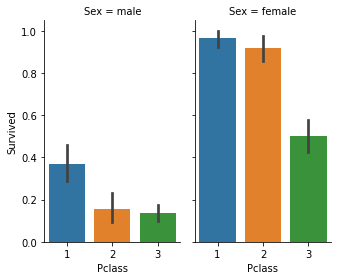

In [165]:
sns.catplot(
    data=train_clean, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4, aspect=.6,
)

**В целом очевидно, что мужчины выживали реже. И чем ниже класс, тем меньше шансов спастись.**

### Гипотеза 2: Выживаемость в зависимости от наличия родственников и супругов

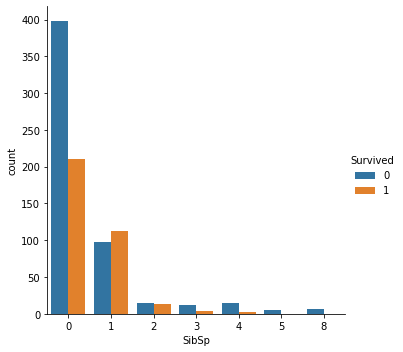

In [168]:
sns.catplot(data=train_clean, x='SibSp', hue='Survived', kind="count")

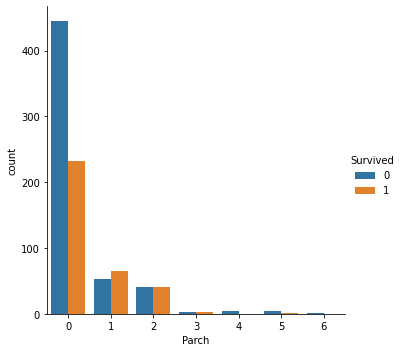

In [169]:
sns.catplot(data=train_clean, x='Parch', hue='Survived', kind="count")

**Есть определённая зависимость: если есть один родственник - шансы выжить немного выше.**
**Объединим эти признаки, чтобы получить более достоверные данные**

In [171]:
train_clean['Family'] = train_clean['Parch'] + train_clean['SibSp']
test_clean['Family'] = test_clean['Parch'] + test_clean['SibSp']

In [172]:
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Family
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,1
2,1,1,female,38.0,1,0,1
3,1,3,female,26.0,0,0,0
4,1,1,female,35.0,1,0,1
5,0,3,male,35.0,0,0,0


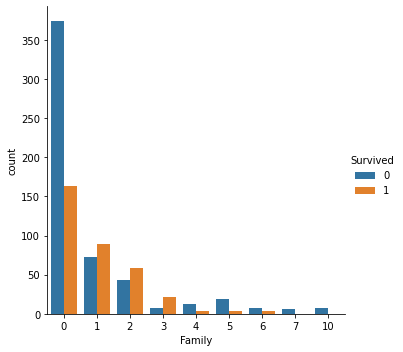

In [173]:
sns.catplot(data=train_clean, x='Family', hue='Survived', kind="count")

**Да, зависимость явно прослеживается. Наличие от 1 до 3 родственников немного повышает шансы выжить.**

**От признаков Parch и SibSp можно избавиться, они нам больше не нужны, так как будут зашумлять модель дублирующей информацией**

In [30]:
useless_columns = ['SibSp', 'Parch']
train_clean = train_clean.drop(columns=useless_columns)
test_clean = test_clean.drop(columns=useless_columns)

## Построение модели
### Baseline

In [32]:
train_clean.head()

,Survived,Pclass,Sex,Age
PassengerId,,,,
1,0,3,male,22.0
2,1,1,female,38.0
3,1,3,female,26.0
4,1,1,female,35.0
5,0,3,male,35.0


## Формула для вычисления псевдообратной матрицы
$ (X^TX)^{-1} X^T $

In [186]:
y = 